#### **Найти решение дифференциального уравнения:** ####

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Выпишем условия данных функций для работы и последующей проверки:

In [208]:
def check_f(n):
    ans = []

    for x in np.arange(0, 1, 1 / n):
        ans.append(8 * x ** 2 + 4 * x + 5 + np.sin(3 * x))
    
    return ans

def df_dx(x):
    return 16 * x + 4 + 3 * np.cos(3 * x)

Простой и модифицированный методы Эйлера:

In [209]:
def Euler(n, x0=0, y0=5):
    h = 1 / n
    euler_y = []

    for _ in range(n):
        euler_y.append(y0)
        y0 += h * df_dx(x0)
        x0 += h

    return euler_y

def mod_Euler(n, x0=0, y0=5):
    h = 1 / n
    mod_euler_y = []

    for _ in range(n):
        mod_euler_y.append(y0)
        y0 += h * (df_dx(x0) + df_dx(x0 + h)) / 2
        x0 += h

    return mod_euler_y


Проверим метод, сравнив его с оригинальной функцией:

In [235]:
for i, j, k in zip(check_f(4), Euler(4), mod_Euler(4)):
    print(f'Original: {i} Euler: {j} Modified Euler: {k}')


Original: 5.0 Euler: 5 Modified Euler: 5
Original: 7.1816387600233345 Euler: 6.75 Modified Euler: 7.149383325827683
Original: 9.997494986604055 Euler: 9.298766651655367 Modified Euler: 9.950293102280755
Original: 13.278073196887922 Euler: 12.351819552906143 Modified Euler: 13.241254444385117


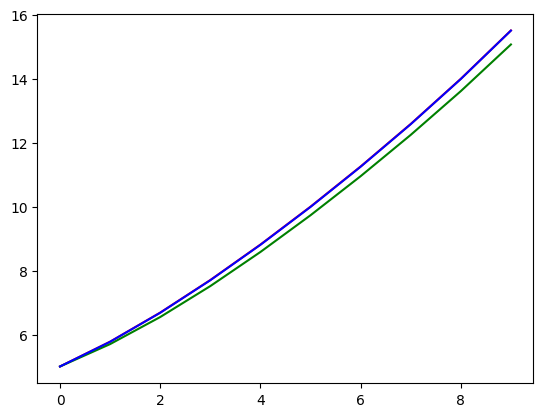

In [211]:
plt.plot(check_f(10), color='red')
plt.plot(Euler(10), color='green')
plt.plot(mod_Euler(10), color='blue')

plt.show()

Создадим таблицу для проверки качества метода:

In [232]:
data = pd.DataFrame(np.array([[abs(Euler(i)[-1] - check_f(i)[-1]) for i in [2 ** j for j in range(1, 9)]],
                            [np.log2(abs(Euler(i)[-1] - check_f(i)[-1]) / abs(Euler(i * 2)[-1] - check_f(i * 2)[-1])) for i in [2 ** j for j in range(1, 9)]], 
                            [abs(mod_Euler(i)[-1] - check_f(i)[-1]) for i in [2 ** j for j in range(1, 9)]], 
                            [np.log2(abs(mod_Euler(i)[-1] - check_f(i)[-1]) / abs(mod_Euler(i * 2)[-1] - check_f(i * 2)[-1])) for i in [2 ** j for j in range(1, 9)]]]).T, 
                    columns=['eps', 'P', 'eps_mod', 'P_mod'], 
                    index=[2 ** i for i in range(1, 9)])
data

,eps,P,eps_mod,P_mod
2,1.497495,0.693072,0.194442,2.400828
4,0.926254,0.804683,0.036819,2.665883
8,0.530269,0.884526,0.005802,2.614463
16,0.287228,0.938194,0.000947,2.471572
32,0.149900,0.968189,0.000171,2.315813
64,0.076621,0.983884,0.000034,2.189631
128,0.038741,0.991892,0.000008,2.105376
256,0.019480,0.995933,0.000002,2.055797
